# Critical Scale Invariance in a Healthy Human Heart Rate
- Asal Kermaniha (NEED ID)
- Barış Kalfa (2150384)
- Javlonbek Jamilov (2163384)
- Yusuf Kenan Şafak (2141676)
- Vladimir Ungureanu (2141678)


## Table of contents

 - Table of contents here
 - Table of contents here
 - Table of contents here



# Introduction

In this project we're replicating the analysis done on the research paper on Physical Review Letters: https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.93.178103

In the research paper, the authors demonstrate the scale invariance of the probability density function of the detrended healthy human heart rate increments. Their results show that the scale invariance is preserved not only in an "idle" state, but also in a dynamical state where the individual's mean heart rate increments is changing over time. Additionally, the scale invariant and fractal structure is shown to be different than the turbulentlike cascade model that's compared with the original model on their paper. The results on the paper strongly suggest that a healthy individual's heart rate is controlled to converge continually to a critical state.

In our project, we're using the dataset provided on the database: https://physionet.org/content/rr-interval-healthy-subjects/1.0.0/

The data consists of long-term time series of RR interbeat intervals belonging a group of healthy individuals of ages up to 55 years old.





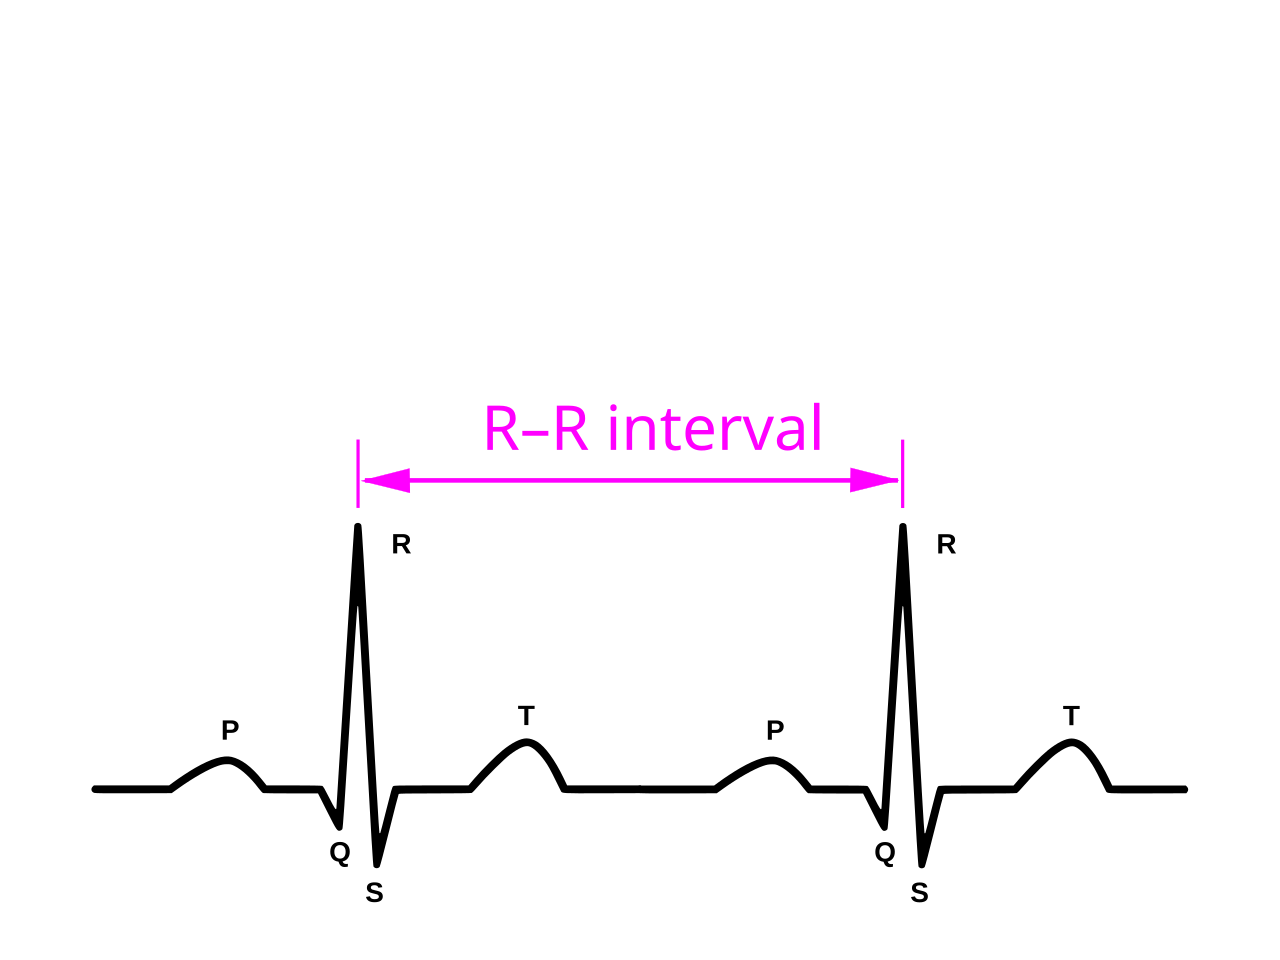

In [1]:
from IPython.display import display, Image

display(Image(filename="ECG-RRinterval.png", width=500, height=500))

## Libraries

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

## Load the data

In [41]:
data_files = ["000","002","003","005","006","008","009","010","011","013"]  # add 008
data = []
for i in data_files:
    f = open("data/" + i + ".txt","r")
    
    data0 = []
    
    for i in f.readlines():
        x = i.strip()
        if x:
            data0.append(int(x))

    data.append(data0)
print(data[0])

[789, 727, 789, 750, 812, 789, 828, 797, 867, 860, 843, 821, 812, 797, 797, 789, 867, 828, 797, 828, 828, 868, 906, 844, 859, 844, 836, 820, 781, 828, 782, 750, 843, 883, 836, 891, 914, 898, 938, 906, 961, 891, 968, 899, 1008, 906, 984, 1000, 969, 1031, 992, 1071, 1078, 1078, 1031, 1078, 1047, 1039, 1078, 1032, 1109, 1023, 1102, 1070, 1125, 1086, 1102, 1101, 1086, 1118, 1023, 1117, 1094, 1062, 1125, 1047, 1071, 1015, 1078, 1016, 1102, 1046, 1079, 1078, 1054, 1102, 1055, 1023, 1094, 1015, 1086, 1071, 984, 1102, 1023, 1086, 1039, 1070, 1055, 1070, 1032, 1023, 1016, 1086, 1015, 1039, 1024, 929, 1008, 1000, 992, 985, 1023, 1016, 1000, 1015, 1024, 1000, 1023, 977, 1023, 993, 1015, 969, 1000, 1039, 992, 1039, 1008, 969, 1000, 953, 969, 1008, 992, 828, 984, 961, 969, 961, 961, 984, 1000, 1016, 1016, 1023, 961, 1078, 1016, 1054, 1040, 1031, 1039, 1039, 922, 945, 984, 1008, 1063, 1031, 1047, 1101, 1047, 1047, 1016, 1031, 977, 1000, 1007, 1016, 1008, 1008, 1031, 961, 1086, 969, 1086, 1054, 1016,

## Normalization and detrending (Not normalized yet)
Last data file is not included.

[Polynomial([-3.14504213e-11, -1.31857434e-11], domain=[    0., 80440.], window=[-1.,  1.], symbol='x'), Polynomial([4.32678981e-11, 7.86857937e-12], domain=[    0., 68028.], window=[-1.,  1.], symbol='x'), Polynomial([ 3.3756479e-11, -1.1802541e-11], domain=[     0., 108149.], window=[-1.,  1.], symbol='x'), Polynomial([2.26416570e-11, 1.08337425e-11], domain=[    0., 97924.], window=[-1.,  1.], symbol='x'), Polynomial([1.02487836e-11, 4.73887805e-12], domain=[    0., 89623.], window=[-1.,  1.], symbol='x'), Polynomial([-4.18318627e-12, -3.88702555e-11], domain=[    0., 98215.], window=[-1.,  1.], symbol='x'), Polynomial([ 1.98710401e-11, -2.22706202e-11], domain=[    0., 67262.], window=[-1.,  1.], symbol='x'), Polynomial([-2.02709383e-10, -1.54603305e-11], domain=[    0., 82079.], window=[-1.,  1.], symbol='x'), Polynomial([2.04362317e-10, 1.33853287e-10], domain=[     0., 110510.], window=[-1.,  1.], symbol='x'), Polynomial([-2.80485960e-11, -6.33985048e-11], domain=[     0., 11152

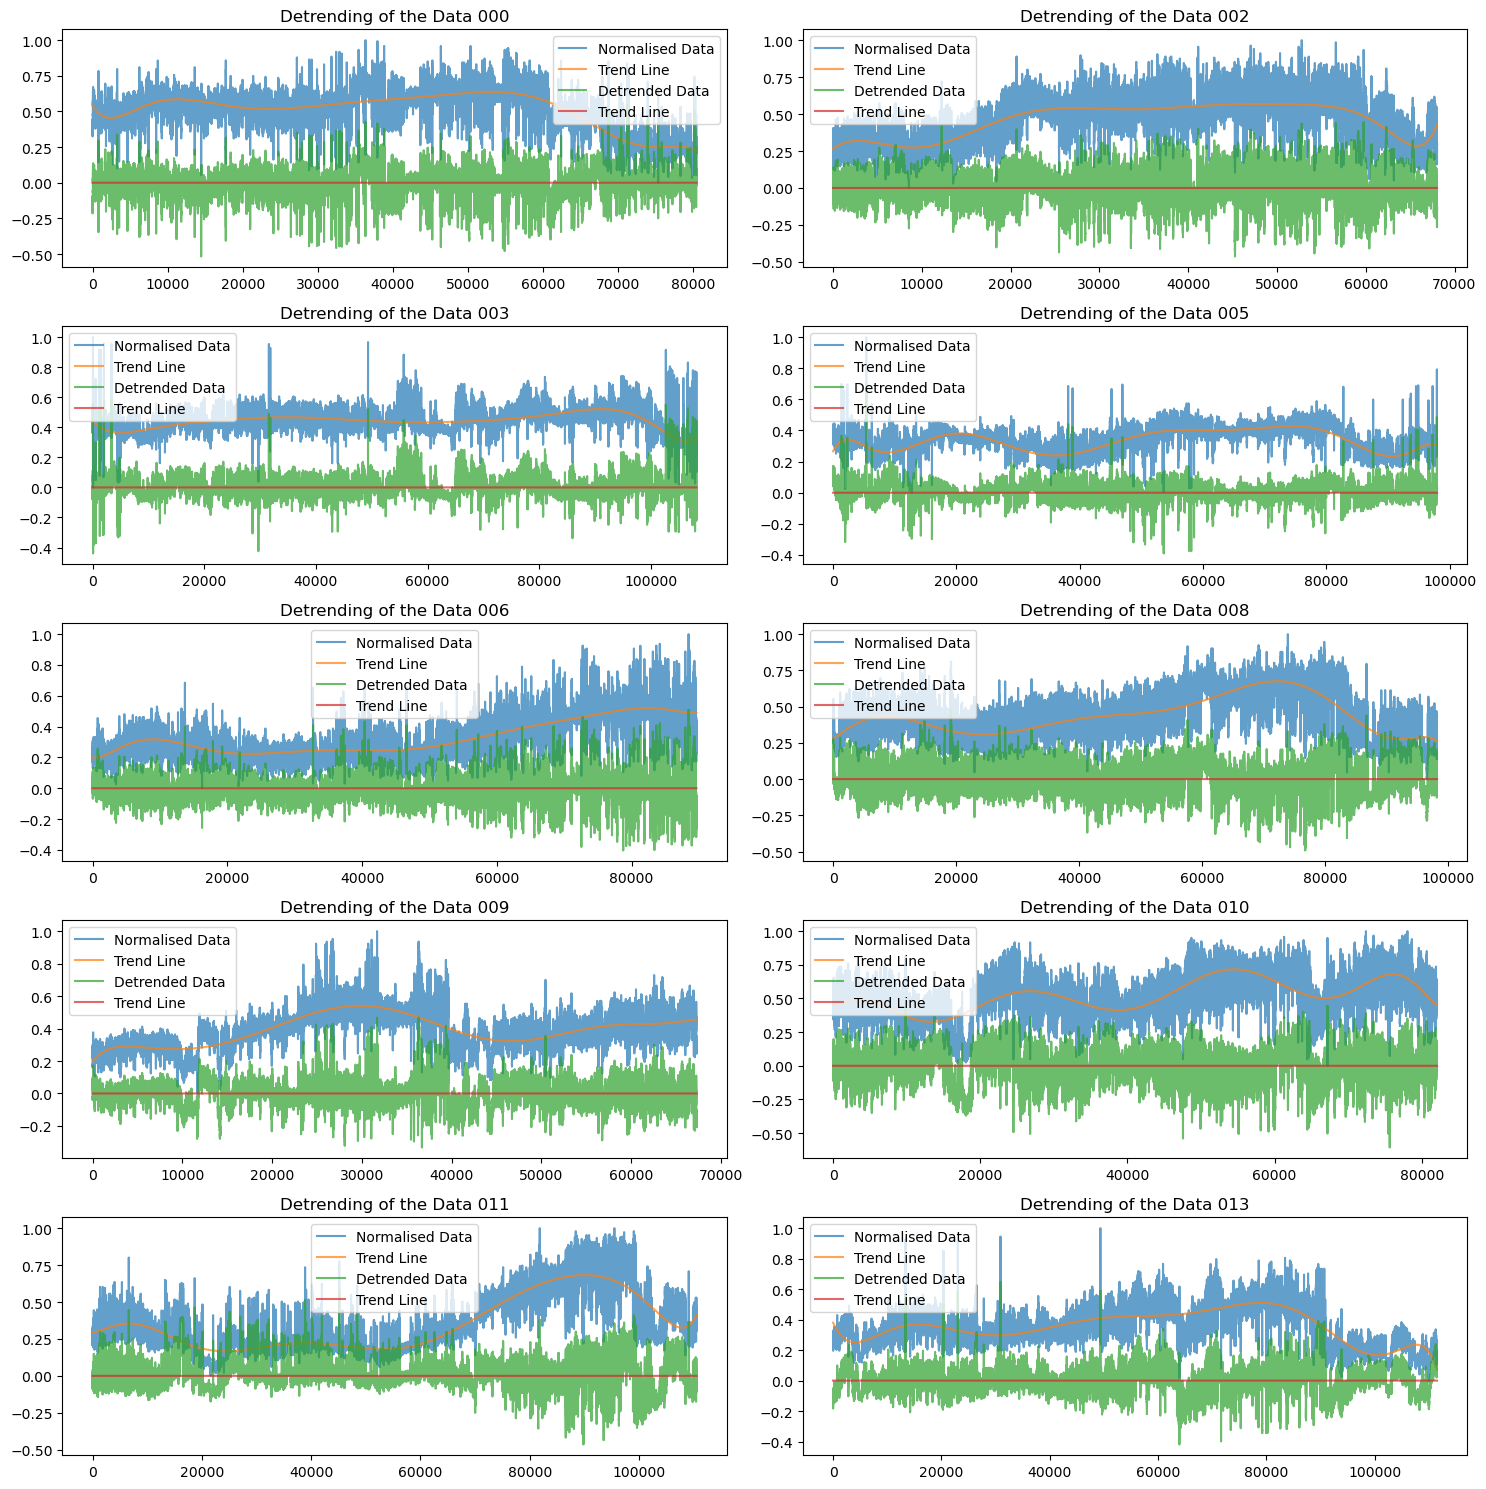

In [19]:

plt.figure(figsize=(15, 15))  
Bi_all = []
Bi_models =[]
for i in range(len(data)):  
    data0 = np.array(data[i])
    mean = np.mean(data0)
    std_dev = np.std(data0)
    #data0_norm = (data0 - mean) / std_dev
    data0_norm = (data0 - np.min(data0)) / (np.max(data0) - np.min(data0))
    
    x = np.arange(len(data0_norm)) 
    degree = 10
    p = Polynomial.fit(x, data0_norm, degree) 
    trend = p(x) 
    detrended_data = data0_norm - trend

    p2 = Polynomial.fit(x, detrended_data, 1) 
    trend2 = p2(x) 
    Bi = np.cumsum(detrended_data)
    Bi_fit = Polynomial.fit(x, Bi, 1) 
    Bi_models.append(Bi_fit)
    Bi_all.append(Bi)
    plt.subplot(5, 2, i + 1)  
    plt.plot(data0_norm, label="Normalised Data", alpha=0.7)
    plt.plot(trend, label="Trend Line", alpha=0.7)
    plt.plot(detrended_data, label="Detrended Data", alpha=0.7)
    plt.plot(trend2, label="Trend Line", alpha=0.7)
    plt.title("Detrending of the Data " + data_files[i])
    plt.legend()

print(Bi_models)
#plt.plot(Bi_all[0])        
plt.tight_layout()
plt.show()


[array([-1.82646779e-11, -1.82646805e-11, -1.82646831e-11, ...,
       -4.44919097e-11, -4.44919124e-11, -4.44919150e-11]), array([3.53993188e-11, 3.53993206e-11, 3.53993225e-11, ...,
       5.39059991e-11, 5.39060009e-11, 5.39060028e-11]), array([4.55590200e-11, 4.55590182e-11, 4.55590165e-11, ...,
       2.80978675e-11, 2.80978657e-11, 2.80978640e-11]), array([1.18079145e-11, 1.18079163e-11, 1.18079181e-11, ...,
       2.95093815e-11, 2.95093833e-11, 2.95093851e-11]), array([5.50990550e-12, 5.50990634e-12, 5.50990719e-12, ...,
       1.39700144e-11, 1.39700152e-11, 1.39700161e-11]), array([ 3.46870692e-11,  3.46870628e-11,  3.46870565e-11, ...,
       -2.86356374e-11, -2.86356438e-11, -2.86356501e-11]), array([ 4.21416603e-11,  4.21416550e-11,  4.21416497e-11, ...,
       -1.08347382e-11, -1.08347435e-11, -1.08347488e-11]), array([-1.87249052e-10, -1.87249055e-10, -1.87249058e-10, ...,
       -2.17386510e-10, -2.17386513e-10, -2.17386516e-10]), array([7.05090306e-11, 7.05090500e-11, 

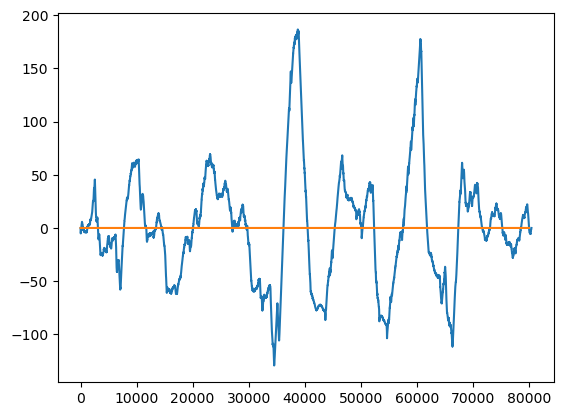

In [27]:
plt.plot(Bi_all[0])

values = np.linspace(0, 80000, 10000000)
model_values = [p(values) for p in Bi_models]
print(model_values)
plt.plot(values, model_values[0])


10
[-2.62272397e-18 -2.62272397e-18 -2.62272397e-18 ... -2.62272397e-18
 -2.62272396e-18 -2.62272398e-18]


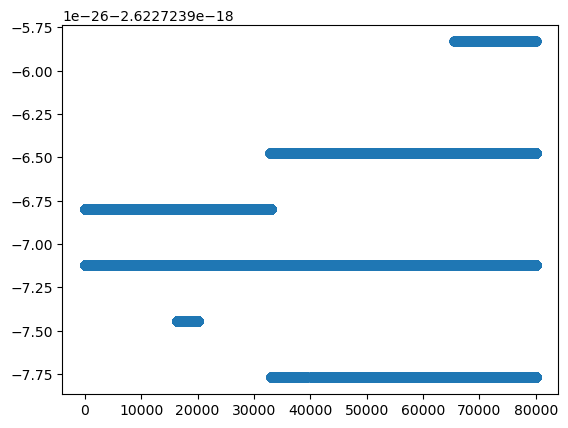

In [40]:
print(len(model_values))
increments = np.diff(model_values[0])
print(increments)
plt.scatter(values[:-1],increments)
plt.show()